In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Load dataset
data = pd.read_csv('synthetic_health_lifestyle_dataset.csv')

# Select relevant columns using correct names
df = data[['Age', 'Height_cm', 'Exercise_Freq', 'Weight_kg']].copy()

# Check missing values
print("Missing values:\n", df.isnull().sum())

# Drop rows with missing values
df.dropna(inplace=True)

# Encode Exercise_Freq (categorical)
le = LabelEncoder()
df['ExerciseFreqEncoded'] = le.fit_transform(df['Exercise_Freq'])

# Features and target
X = df[['Age', 'Height_cm', 'ExerciseFreqEncoded']]
y = df['Weight_kg']

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")


Missing values:
 Age                 0
Height_cm           0
Exercise_Freq    1879
Weight_kg           0
dtype: int64
Mean Squared Error: 222.13


In [29]:
import numpy as np
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f} kg")


Root Mean Squared Error (RMSE): 14.90 kg


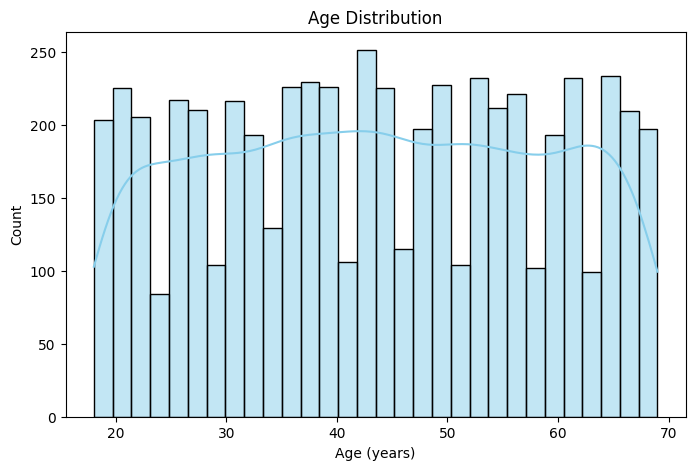

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.show()


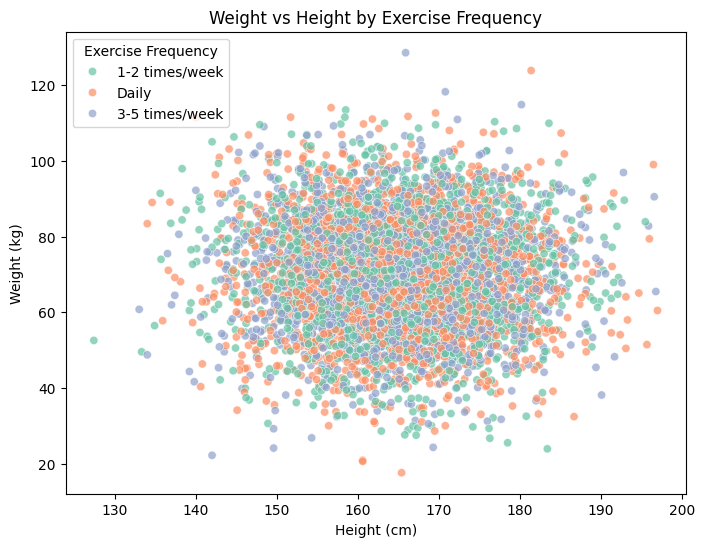

In [31]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Height_cm', y='Weight_kg', hue='Exercise_Freq', data=df, palette='Set2', alpha=0.7)
plt.title('Weight vs Height by Exercise Frequency')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.legend(title='Exercise Frequency')
plt.show()


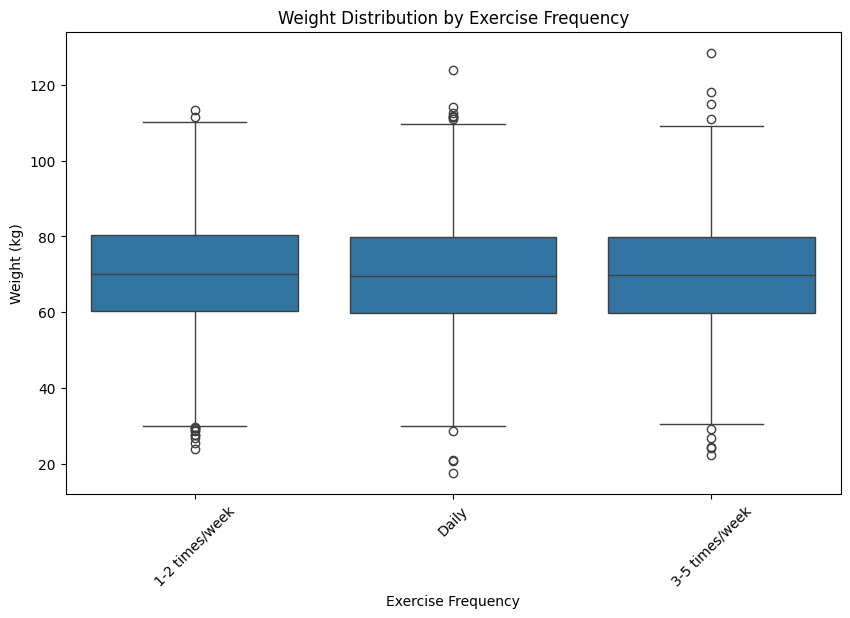

In [32]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Exercise_Freq', y='Weight_kg', data=df)
plt.title('Weight Distribution by Exercise Frequency')
plt.xlabel('Exercise Frequency')
plt.ylabel('Weight (kg)')
plt.xticks(rotation=45)
plt.show()


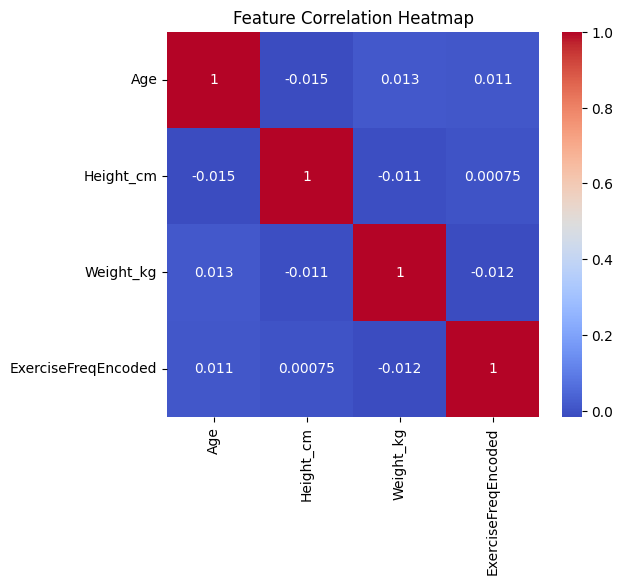

In [33]:
plt.figure(figsize=(6,5))
sns.heatmap(df[['Age', 'Height_cm', 'Weight_kg', 'ExerciseFreqEncoded']].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()
